In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

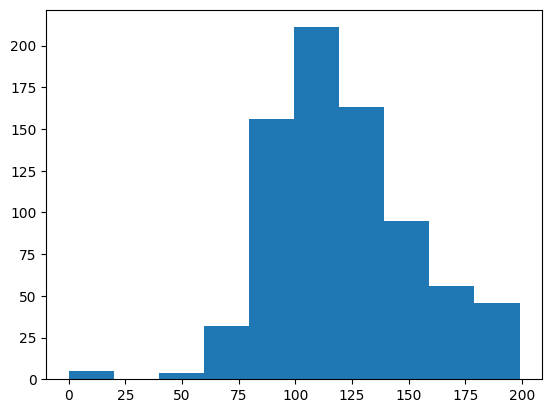

In [ ]:
plt.hist(df['Glucose'])

In [ ]:
# filter the 1 and 0 type people

len(df[df['Outcome']==0])

500

In [ ]:
len(df[df['Outcome']==1])

268

In [ ]:
df[df['Outcome']==1]['Glucose']

,Glucose
0,148
2,183
4,137
6,78
8,197
...,...
755,128
757,123
759,190
761,170


Text(0.5, 1.0, 'Glucose Distribution')

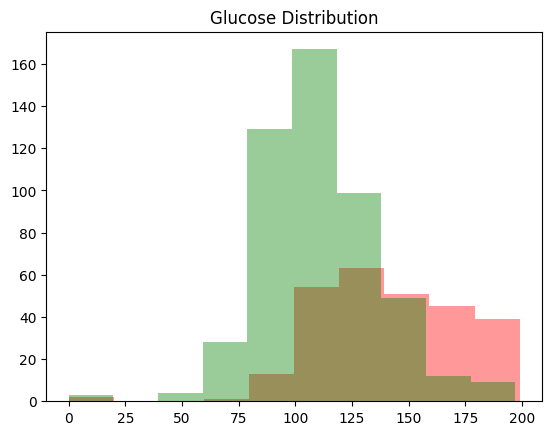

In [ ]:
plt.hist(df[df['Outcome']==1]['Glucose'],color = 'Red',alpha = 0.4)
plt.hist(df[df['Outcome']==0]['Glucose'],color = 'Green',alpha = 0.4)
plt.title('Glucose Distribution')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
for i in df.columns[:-1]:
  print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


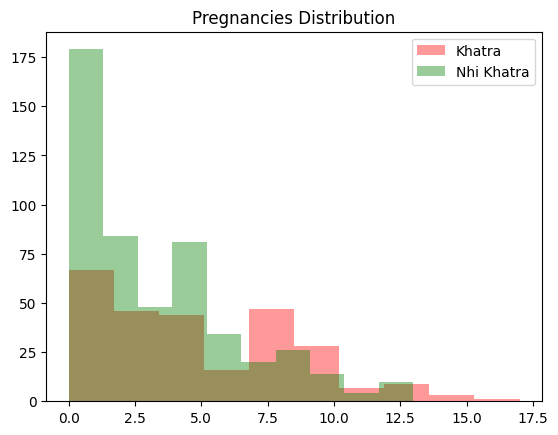

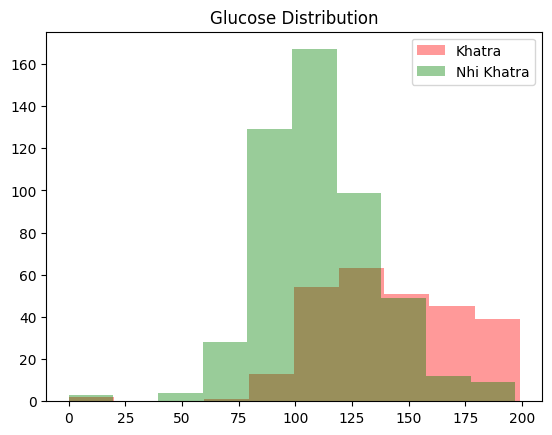

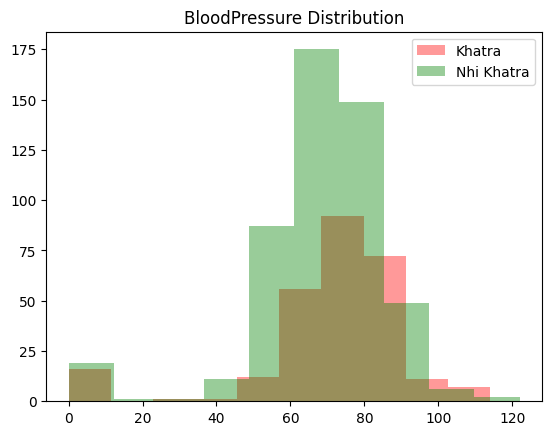

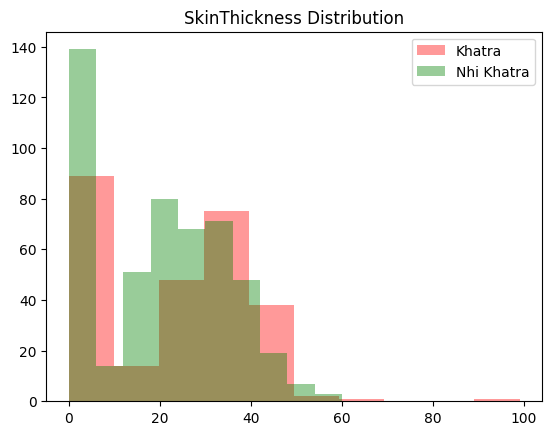

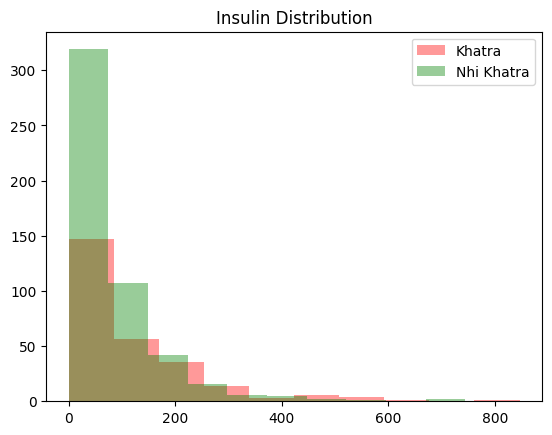

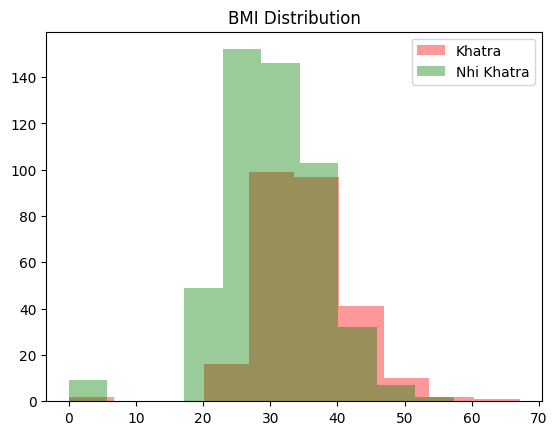

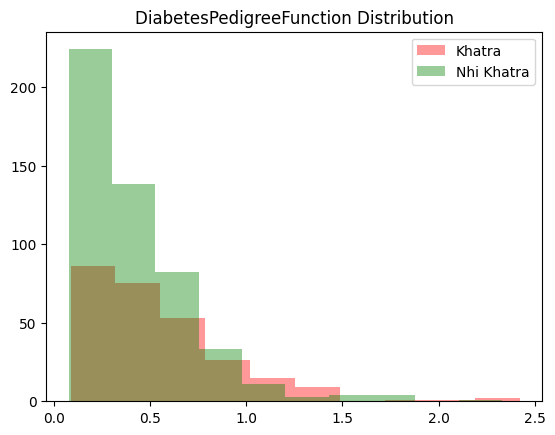

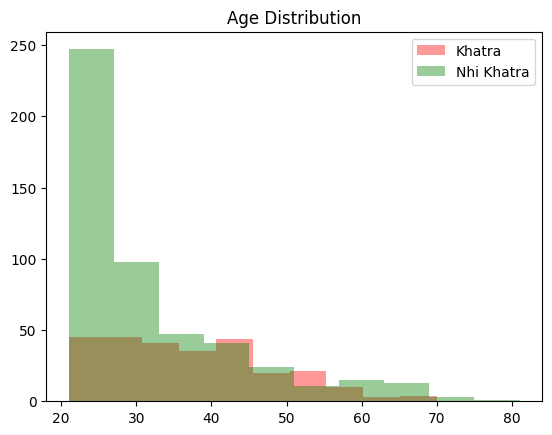

In [ ]:
for i in df.columns[:-1]:
  plt.hist(df[df['Outcome']==1][i],color = 'Red',alpha = 0.4,label = "Khatra")
  plt.hist(df[df['Outcome']==0][i],color = 'Green',alpha = 0.4,label = "Nhi Khatra")
  plt.legend()
  plt.title(f'{i} Distribution')
  plt.show()

In [ ]:
# x and y

x = df[df.columns[:-1]]
y = df['Outcome']

In [ ]:
# Call the models

knn_model = KNeighborsClassifier()
NB_model = GaussianNB()
svm_model = SVC()

In [ ]:
# Train test splits

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

In [ ]:
# Train the model

knn_model.fit(x_train,y_train)
NB_model.fit(x_train,y_train)
svm_model.fit(x_train,y_train)

SVC()

In [ ]:
# Testing the model

knn_pred = knn_model.predict(x_test)
NB_pred = NB_model.predict(x_test)
svm_pred = svm_model.predict(x_test)

In [ ]:
# Evaluation

print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       101
           1       0.61      0.43      0.51        53

    accuracy                           0.71       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.69      0.71      0.69       154



In [ ]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       101
           1       0.69      0.55      0.61        53

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [ ]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       101
           1       0.74      0.38      0.50        53

    accuracy                           0.74       154
   macro avg       0.74      0.65      0.66       154
weighted avg       0.74      0.74      0.71       154

